# Importing Packages

In [805]:
import numpy as np 
import pandas as pd 
import cplex
from docplex.mp.model import Model
import matplotlib.pyplot as plt
import seaborn as snsw
from glob import glob
import plotly.express as px
import networkx as nx

In [806]:
#create a cplex model, and name constraints for debugging purposes.

FAM = Model(name='FAM', cts_by_name=True)

# Fleet cost

In [807]:
scheduleDF = pd.read_csv('schedule.csv')

In [808]:
scheduleDF

,Flight_no,Org,DepTime,DepTime(mins),Dest,ArrTime,NxtDay,ArrTime(mins),Distance,Demand_mean,Demand_Std,B737_cost,B757_cost,Flight_index
0,1,HAK,600,360,SIN,830,0,510,"2,172",208,22,NaN,NaN,1_HAKSIN
1,2,HAK,630,390,BKK,900,0,540,"1,244",115,14,NaN,NaN,2_HAKBKK
2,3,HAK,700,420,KHN,930,0,570,"1,132",176,36,NaN,NaN,3_HAKKHN
3,4,BKK,930,570,HAK,1130,0,690,"1,244",189,23,NaN,NaN,4_BKKHAK
4,5,SIN,930,570,HAK,1200,0,720,"2,172",221,38,NaN,NaN,5_SINHAK
5,6,KHN,1030,630,HAK,1230,0,750,"1,132",189,22,NaN,NaN,6_KHNHAK
6,7,HAK,1230,750,BKK,1500,0,900,"1,244",139,24,NaN,NaN,7_HAKBKK
7,8,HAK,1330,810,KHN,1530,0,930,"1,132",220,37,NaN,NaN,8_HAKKHN
8,9,HAK,1330,810,SIN,1600,0,960,"2,172",187,30,NaN,NaN,9_HAKSIN
9,10,BKK,1545,945,HAK,1745,0,1065,"1,244",180,38,NaN,NaN,10_BKKHAK


In [809]:
scheduleDF['B737_cost'] = 0.0
scheduleDF['B757_cost'] = 0.0

In [810]:
scheduleDF

,Flight_no,Org,DepTime,DepTime(mins),Dest,ArrTime,NxtDay,ArrTime(mins),Distance,Demand_mean,Demand_Std,B737_cost,B757_cost,Flight_index
0,1,HAK,600,360,SIN,830,0,510,"2,172",208,22,0.0,0.0,1_HAKSIN
1,2,HAK,630,390,BKK,900,0,540,"1,244",115,14,0.0,0.0,2_HAKBKK
2,3,HAK,700,420,KHN,930,0,570,"1,132",176,36,0.0,0.0,3_HAKKHN
3,4,BKK,930,570,HAK,1130,0,690,"1,244",189,23,0.0,0.0,4_BKKHAK
4,5,SIN,930,570,HAK,1200,0,720,"2,172",221,38,0.0,0.0,5_SINHAK
5,6,KHN,1030,630,HAK,1230,0,750,"1,132",189,22,0.0,0.0,6_KHNHAK
6,7,HAK,1230,750,BKK,1500,0,900,"1,244",139,24,0.0,0.0,7_HAKBKK
7,8,HAK,1330,810,KHN,1530,0,930,"1,132",220,37,0.0,0.0,8_HAKKHN
8,9,HAK,1330,810,SIN,1600,0,960,"2,172",187,30,0.0,0.0,9_HAKSIN
9,10,BKK,1545,945,HAK,1745,0,1065,"1,244",180,38,0.0,0.0,10_BKKHAK


# Reading aircraft configuration

In [811]:
# Create a dictionary to store A/C data
# we have B737 and B757 in our fleets.

aircraftData = {'B737Capacity':170.0,
                'B737UnitCost':0.09,
                'B737UnitRevenue':0.15,
                'B757Capacity':230.0,
                'B757UnitCost':0.11,
                'B757UnitRevenue':0.15}

In [812]:
aircraftData

{'B737Capacity': 170.0,
 'B737UnitCost': 0.09,
 'B737UnitRevenue': 0.15,
 'B757Capacity': 230.0,
 'B757UnitCost': 0.11,
 'B757UnitRevenue': 0.15}

# Create a new DF to store cost calculation data

In [813]:
costDF = scheduleDF[['Flight_no','Distance']]

In [814]:
costDF

,Flight_no,Distance
0,1,"2,172"
1,2,"1,244"
2,3,"1,132"
3,4,"1,244"
4,5,"2,172"
5,6,"1,132"
6,7,"1,244"
7,8,"1,132"
8,9,"2,172"
9,10,"1,244"


In [815]:
costDF.dtypes

Flight_no     int64
Distance     object
dtype: object

In [816]:
# converting to float64

costDF['Distance'] = costDF['Distance'].str.replace(',', '').astype(float)
costDF['Flight_no'] = costDF['Flight_no'].astype(float)

/var/folders/34/1d5cw2sd1g72r24h9_zrrfyh0000gn/T/ipykernel_2454/1683650268.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/34/1d5cw2sd1g72r24h9_zrrfyh0000gn/T/ipykernel_2454/1683650268.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [817]:
costDF.dtypes

Flight_no    float64
Distance     float64
dtype: object

# Cost calculation

In [818]:
aircraftData['B737Capacity']

170.0

In [819]:
aircraftData['B737UnitCost']

0.09

In [820]:
# OpsCost_B787 = Distanceance x B787UnitCost x B787Capacity

costDF['OpsCost_B737'] = costDF['Distance'].apply(lambda x: x* aircraftData['B737Capacity']* aircraftData['B737UnitCost'])

/var/folders/34/1d5cw2sd1g72r24h9_zrrfyh0000gn/T/ipykernel_2454/882175339.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [821]:
costDF

,Flight_no,Distance,OpsCost_B737
0,1.0,2172.0,33231.6
1,2.0,1244.0,19033.2
2,3.0,1132.0,17319.6
3,4.0,1244.0,19033.2
4,5.0,2172.0,33231.6
5,6.0,1132.0,17319.6
6,7.0,1244.0,19033.2
7,8.0,1132.0,17319.6
8,9.0,2172.0,33231.6
9,10.0,1244.0,19033.2


In [822]:
costDF['OpsCost_B757'] = costDF['Distance'].apply(lambda x: x* aircraftData['B757Capacity']* \
                        aircraftData['B757UnitCost'])

/var/folders/34/1d5cw2sd1g72r24h9_zrrfyh0000gn/T/ipykernel_2454/1737943150.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [823]:
costDF

,Flight_no,Distance,OpsCost_B737,OpsCost_B757
0,1.0,2172.0,33231.6,54951.6
1,2.0,1244.0,19033.2,31473.2
2,3.0,1132.0,17319.6,28639.6
3,4.0,1244.0,19033.2,31473.2
4,5.0,2172.0,33231.6,54951.6
5,6.0,1132.0,17319.6,28639.6
6,7.0,1244.0,19033.2,31473.2
7,8.0,1132.0,17319.6,28639.6
8,9.0,2172.0,33231.6,54951.6
9,10.0,1244.0,19033.2,31473.2


# Calculate Passenger Spill and spill costs

In [824]:
# check the input data DF
scheduleDF

,Flight_no,Org,DepTime,DepTime(mins),Dest,ArrTime,NxtDay,ArrTime(mins),Distance,Demand_mean,Demand_Std,B737_cost,B757_cost,Flight_index
0,1,HAK,600,360,SIN,830,0,510,"2,172",208,22,0.0,0.0,1_HAKSIN
1,2,HAK,630,390,BKK,900,0,540,"1,244",115,14,0.0,0.0,2_HAKBKK
2,3,HAK,700,420,KHN,930,0,570,"1,132",176,36,0.0,0.0,3_HAKKHN
3,4,BKK,930,570,HAK,1130,0,690,"1,244",189,23,0.0,0.0,4_BKKHAK
4,5,SIN,930,570,HAK,1200,0,720,"2,172",221,38,0.0,0.0,5_SINHAK
5,6,KHN,1030,630,HAK,1230,0,750,"1,132",189,22,0.0,0.0,6_KHNHAK
6,7,HAK,1230,750,BKK,1500,0,900,"1,244",139,24,0.0,0.0,7_HAKBKK
7,8,HAK,1330,810,KHN,1530,0,930,"1,132",220,37,0.0,0.0,8_HAKKHN
8,9,HAK,1330,810,SIN,1600,0,960,"2,172",187,30,0.0,0.0,9_HAKSIN
9,10,BKK,1545,945,HAK,1745,0,1065,"1,244",180,38,0.0,0.0,10_BKKHAK


In [825]:
from numpy.random import normal
np.random.seed(101)

In [826]:
# Generate samples from a 'normal' demnad Distanceribution for each flight
# Starting with Flight_1:

mean_Flight_1 = scheduleDF[ scheduleDF['Flight_no'] == 1.0 ]['Demand_mean']
std_Flight_1 = scheduleDF[ scheduleDF['Flight_no'] == 1.0 ]['Demand_Std']

In [827]:
mean_Flight_1

0    208
Name: Demand_mean, dtype: int64

In [828]:
std_Flight_1

0    22
Name: Demand_Std, dtype: int64

In [829]:
#generate 1,000 samples from N(mean,std) for flight #1
#store the samples in spillDF

spillDF = pd.DataFrame(normal(mean_Flight_1,std_Flight_1,1000),columns=['Flight_1'])

In [830]:
spillDF

,Flight_1
0,267.550696
1,221.818920
2,227.975328
3,219.084167
4,222.324595
...,...
995,190.688088
996,199.112133
997,212.366603
998,222.212965


In [831]:
# Double check mean

spillDF['Flight_1'].mean()

208.58151722661435

In [832]:
# Double check SD

spillDF['Flight_1'].std()

23.175497535168176

In [833]:
# Check B737 capacity

aircraftData['B737Capacity']

170.0

In [834]:
# create a new column 'spillB787_Flight_1' in spillDF and initialise
spillDF['spillB737_Flight_1'] = 0.0

In [835]:
# calculating spill

x = 0
for x in range(1000):
    if (spillDF['Flight_1'].iloc[x] > aircraftData['B737Capacity']):
        spillDF['spillB737_Flight_1'].iloc[x] = spillDF['Flight_1'].iloc[x] - aircraftData['B737Capacity']
        print(x)
    else:
        spillDF['spillB737_Flight_1'].iloc[x] = 0.0

0
1
2
3
4
5
6
7
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
164
165
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
277
278
279
280
282
283
284
28

In [836]:
# Check result

spillDF

,Flight_1,spillB737_Flight_1
0,267.550696,97.550696
1,221.818920,51.818920
2,227.975328,57.975328
3,219.084167,49.084167
4,222.324595,52.324595
...,...,...
995,190.688088,20.688088
996,199.112133,29.112133
997,212.366603,42.366603
998,222.212965,52.212965


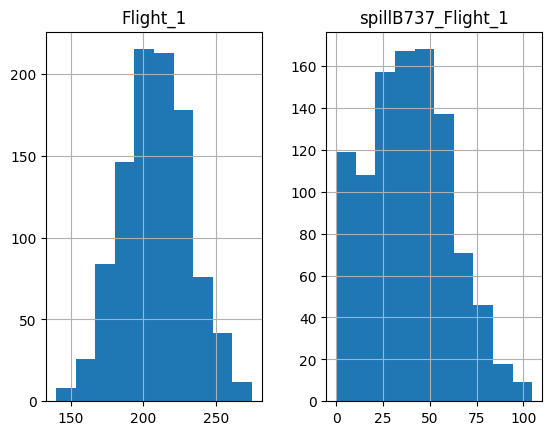

In [837]:
spillDF.hist()
plt.savefig('flight1_spill.png', format="png", dpi = 300)

In [838]:
# Average spill

spillDF['spillB737_Flight_1'].mean()

38.98710494946749

In [839]:
# Creat all columns with lables we need right here
spillDF['Flight_2'] = 0.0
spillDF['spillB737_Flight_2'] = 0.0

In [840]:
spillDF

,Flight_1,spillB737_Flight_1,Flight_2,spillB737_Flight_2
0,267.550696,97.550696,0.0,0.0
1,221.818920,51.818920,0.0,0.0
2,227.975328,57.975328,0.0,0.0
3,219.084167,49.084167,0.0,0.0
4,222.324595,52.324595,0.0,0.0
...,...,...,...,...
995,190.688088,20.688088,0.0,0.0
996,199.112133,29.112133,0.0,0.0
997,212.366603,42.366603,0.0,0.0
998,222.212965,52.212965,0.0,0.0


In [841]:
# Number of flights
num_flights = 18

# Create columns using a loop
for i in range(3, num_flights + 1):
    spillDF[f'Flight_{i}'] = 0.0
    spillDF[f'spillB737_Flight_{i}'] = 0.0

In [842]:
spillDF

,Flight_1,spillB737_Flight_1,Flight_2,spillB737_Flight_2,Flight_3,spillB737_Flight_3,Flight_4,spillB737_Flight_4,Flight_5,spillB737_Flight_5,...,Flight_14,spillB737_Flight_14,Flight_15,spillB737_Flight_15,Flight_16,spillB737_Flight_16,Flight_17,spillB737_Flight_17,Flight_18,spillB737_Flight_18
0,267.550696,97.550696,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,221.818920,51.818920,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,227.975328,57.975328,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,219.084167,49.084167,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,222.324595,52.324595,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,190.688088,20.688088,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,199.112133,29.112133,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,212.366603,42.366603,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,222.212965,52.212965,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [843]:
# creating a loop

for i in range(2, num_flights + 1):
    mean_flight_i = scheduleDF[scheduleDF['Flight_no'] == float(i)]['Demand_mean']
    std_flight_i = scheduleDF[scheduleDF['Flight_no'] == float(i)]['Demand_Std']
    spillDF[f'Flight_{i}'] = normal(mean_flight_i, std_flight_i, 1000)


In [844]:
spillDF

,Flight_1,spillB737_Flight_1,Flight_2,spillB737_Flight_2,Flight_3,spillB737_Flight_3,Flight_4,spillB737_Flight_4,Flight_5,spillB737_Flight_5,...,Flight_14,spillB737_Flight_14,Flight_15,spillB737_Flight_15,Flight_16,spillB737_Flight_16,Flight_17,spillB737_Flight_17,Flight_18,spillB737_Flight_18
0,267.550696,97.550696,124.122780,0.0,121.398770,0.0,176.638735,0.0,142.974435,0.0,...,113.503618,0.0,118.245505,0.0,275.063446,0.0,213.204492,0.0,256.206547,0.0
1,221.818920,51.818920,113.953061,0.0,218.026311,0.0,177.703594,0.0,276.121436,0.0,...,226.046827,0.0,117.757614,0.0,302.440443,0.0,232.993649,0.0,235.567173,0.0
2,227.975328,57.975328,109.616157,0.0,208.754780,0.0,198.260527,0.0,285.658433,0.0,...,143.549017,0.0,129.557512,0.0,271.305205,0.0,216.572912,0.0,232.837285,0.0
3,219.084167,49.084167,121.126236,0.0,173.607749,0.0,199.200001,0.0,198.864689,0.0,...,48.956251,0.0,127.834209,0.0,248.608278,0.0,176.867753,0.0,230.537009,0.0
4,222.324595,52.324595,107.873207,0.0,168.480868,0.0,183.489259,0.0,256.867081,0.0,...,181.237922,0.0,92.254054,0.0,276.757469,0.0,251.016098,0.0,248.705370,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,190.688088,20.688088,126.103381,0.0,197.357690,0.0,154.914595,0.0,259.807763,0.0,...,196.826062,0.0,155.323901,0.0,315.985460,0.0,239.187440,0.0,238.768185,0.0
996,199.112133,29.112133,174.648701,0.0,142.536005,0.0,224.203536,0.0,295.291932,0.0,...,180.068295,0.0,126.989662,0.0,247.405462,0.0,153.763304,0.0,212.582906,0.0
997,212.366603,42.366603,115.615127,0.0,215.466368,0.0,216.175457,0.0,192.680731,0.0,...,155.337214,0.0,196.379732,0.0,311.791716,0.0,237.078756,0.0,261.531593,0.0
998,222.212965,52.212965,133.027044,0.0,182.436760,0.0,200.498902,0.0,278.117358,0.0,...,140.708577,0.0,209.514340,0.0,264.908501,0.0,214.022763,0.0,256.990393,0.0


In [845]:
# repeat calculation

for x in range(1000):
    if (spillDF['Flight_2'].iloc[x] > aircraftData['B737Capacity']):
        spillDF['spillB737_Flight_2'].iloc[x] = spillDF['Flight_2'].iloc[x] - aircraftData['B737Capacity']
        #print(x) #this line is for testing purposes only.
    else:
        spillDF['spillB737_Flight_2'].iloc[x] = 0.0

In [846]:
spillDF

,Flight_1,spillB737_Flight_1,Flight_2,spillB737_Flight_2,Flight_3,spillB737_Flight_3,Flight_4,spillB737_Flight_4,Flight_5,spillB737_Flight_5,...,Flight_14,spillB737_Flight_14,Flight_15,spillB737_Flight_15,Flight_16,spillB737_Flight_16,Flight_17,spillB737_Flight_17,Flight_18,spillB737_Flight_18
0,267.550696,97.550696,124.122780,0.000000,121.398770,0.0,176.638735,0.0,142.974435,0.0,...,113.503618,0.0,118.245505,0.0,275.063446,0.0,213.204492,0.0,256.206547,0.0
1,221.818920,51.818920,113.953061,0.000000,218.026311,0.0,177.703594,0.0,276.121436,0.0,...,226.046827,0.0,117.757614,0.0,302.440443,0.0,232.993649,0.0,235.567173,0.0
2,227.975328,57.975328,109.616157,0.000000,208.754780,0.0,198.260527,0.0,285.658433,0.0,...,143.549017,0.0,129.557512,0.0,271.305205,0.0,216.572912,0.0,232.837285,0.0
3,219.084167,49.084167,121.126236,0.000000,173.607749,0.0,199.200001,0.0,198.864689,0.0,...,48.956251,0.0,127.834209,0.0,248.608278,0.0,176.867753,0.0,230.537009,0.0
4,222.324595,52.324595,107.873207,0.000000,168.480868,0.0,183.489259,0.0,256.867081,0.0,...,181.237922,0.0,92.254054,0.0,276.757469,0.0,251.016098,0.0,248.705370,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,190.688088,20.688088,126.103381,0.000000,197.357690,0.0,154.914595,0.0,259.807763,0.0,...,196.826062,0.0,155.323901,0.0,315.985460,0.0,239.187440,0.0,238.768185,0.0
996,199.112133,29.112133,174.648701,4.648701,142.536005,0.0,224.203536,0.0,295.291932,0.0,...,180.068295,0.0,126.989662,0.0,247.405462,0.0,153.763304,0.0,212.582906,0.0
997,212.366603,42.366603,115.615127,0.000000,215.466368,0.0,216.175457,0.0,192.680731,0.0,...,155.337214,0.0,196.379732,0.0,311.791716,0.0,237.078756,0.0,261.531593,0.0
998,222.212965,52.212965,133.027044,0.000000,182.436760,0.0,200.498902,0.0,278.117358,0.0,...,140.708577,0.0,209.514340,0.0,264.908501,0.0,214.022763,0.0,256.990393,0.0


In [847]:
# Loop to repeat spill calculation
for i in range(3, num_flights + 1):
    for x in range(1000):
        if (spillDF[f'Flight_{i}'].iloc[x] > aircraftData['B737Capacity']):
            spillDF[f'spillB737_Flight_{i}'].iloc[x] = spillDF[f'Flight_{i}'].iloc[x] - aircraftData['B737Capacity']
        else:
            spillDF[f'spillB737_Flight_{i}'].iloc[x] = 0.0

In [848]:
spillDF

,Flight_1,spillB737_Flight_1,Flight_2,spillB737_Flight_2,Flight_3,spillB737_Flight_3,Flight_4,spillB737_Flight_4,Flight_5,spillB737_Flight_5,...,Flight_14,spillB737_Flight_14,Flight_15,spillB737_Flight_15,Flight_16,spillB737_Flight_16,Flight_17,spillB737_Flight_17,Flight_18,spillB737_Flight_18
0,267.550696,97.550696,124.122780,0.000000,121.398770,0.000000,176.638735,6.638735,142.974435,0.000000,...,113.503618,0.000000,118.245505,0.000000,275.063446,105.063446,213.204492,43.204492,256.206547,86.206547
1,221.818920,51.818920,113.953061,0.000000,218.026311,48.026311,177.703594,7.703594,276.121436,106.121436,...,226.046827,56.046827,117.757614,0.000000,302.440443,132.440443,232.993649,62.993649,235.567173,65.567173
2,227.975328,57.975328,109.616157,0.000000,208.754780,38.754780,198.260527,28.260527,285.658433,115.658433,...,143.549017,0.000000,129.557512,0.000000,271.305205,101.305205,216.572912,46.572912,232.837285,62.837285
3,219.084167,49.084167,121.126236,0.000000,173.607749,3.607749,199.200001,29.200001,198.864689,28.864689,...,48.956251,0.000000,127.834209,0.000000,248.608278,78.608278,176.867753,6.867753,230.537009,60.537009
4,222.324595,52.324595,107.873207,0.000000,168.480868,0.000000,183.489259,13.489259,256.867081,86.867081,...,181.237922,11.237922,92.254054,0.000000,276.757469,106.757469,251.016098,81.016098,248.705370,78.705370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,190.688088,20.688088,126.103381,0.000000,197.357690,27.357690,154.914595,0.000000,259.807763,89.807763,...,196.826062,26.826062,155.323901,0.000000,315.985460,145.985460,239.187440,69.187440,238.768185,68.768185
996,199.112133,29.112133,174.648701,4.648701,142.536005,0.000000,224.203536,54.203536,295.291932,125.291932,...,180.068295,10.068295,126.989662,0.000000,247.405462,77.405462,153.763304,0.000000,212.582906,42.582906
997,212.366603,42.366603,115.615127,0.000000,215.466368,45.466368,216.175457,46.175457,192.680731,22.680731,...,155.337214,0.000000,196.379732,26.379732,311.791716,141.791716,237.078756,67.078756,261.531593,91.531593
998,222.212965,52.212965,133.027044,0.000000,182.436760,12.436760,200.498902,30.498902,278.117358,108.117358,...,140.708577,0.000000,209.514340,39.514340,264.908501,94.908501,214.022763,44.022763,256.990393,86.990393


array([[<Axes: title={'center': 'Flight_1'}>,
        <Axes: title={'center': 'spillB737_Flight_1'}>,
        <Axes: title={'center': 'Flight_2'}>,
        <Axes: title={'center': 'spillB737_Flight_2'}>,
        <Axes: title={'center': 'Flight_3'}>,
        <Axes: title={'center': 'spillB737_Flight_3'}>],
       [<Axes: title={'center': 'Flight_4'}>,
        <Axes: title={'center': 'spillB737_Flight_4'}>,
        <Axes: title={'center': 'Flight_5'}>,
        <Axes: title={'center': 'spillB737_Flight_5'}>,
        <Axes: title={'center': 'Flight_6'}>,
        <Axes: title={'center': 'spillB737_Flight_6'}>],
       [<Axes: title={'center': 'Flight_7'}>,
        <Axes: title={'center': 'spillB737_Flight_7'}>,
        <Axes: title={'center': 'Flight_8'}>,
        <Axes: title={'center': 'spillB737_Flight_8'}>,
        <Axes: title={'center': 'Flight_9'}>,
        <Axes: title={'center': 'spillB737_Flight_9'}>],
       [<Axes: title={'center': 'Flight_10'}>,
        <Axes: title={'center': 

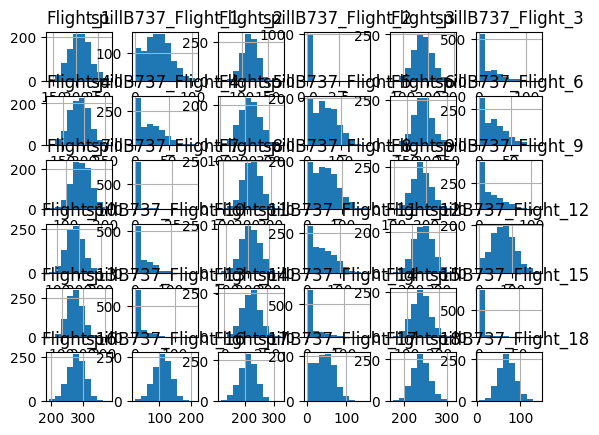

In [849]:
spillDF.hist()

In [850]:
# calculating expected spill numbers

spillDF['spillB737_Flight_1'].mean()

38.98710494946749

In [851]:
costDF['ExpectedSpill_B737'] = 0.0 

for x in range(18):
    costDF['ExpectedSpill_B737'].iloc[x] = spillDF['spillB737_Flight_'+ str(x+1)].mean()
    
costDF

/var/folders/34/1d5cw2sd1g72r24h9_zrrfyh0000gn/T/ipykernel_2454/2773654771.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/34/1d5cw2sd1g72r24h9_zrrfyh0000gn/T/ipykernel_2454/2773654771.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/34/1d5cw2sd1g72r24h9_zrrfyh0000gn/T/ipykernel_2454/2773654771.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/

,Flight_no,Distance,OpsCost_B737,OpsCost_B757,ExpectedSpill_B737
0,1.0,2172.0,33231.6,54951.6,38.987105
1,2.0,1244.0,19033.2,31473.2,0.004649
2,3.0,1132.0,17319.6,28639.6,18.731539
3,4.0,1244.0,19033.2,31473.2,21.688653
4,5.0,2172.0,33231.6,54951.6,53.189970
5,6.0,1132.0,17319.6,28639.6,21.575935
6,7.0,1244.0,19033.2,31473.2,1.028865
7,8.0,1132.0,17319.6,28639.6,51.803491
8,9.0,2172.0,33231.6,54951.6,21.213201
9,10.0,1244.0,19033.2,31473.2,21.135366


In [852]:
costDF['SpillCost_B737'] = 0.0

for x in range(18):
    costDF['SpillCost_B737'].iloc[x] = costDF['ExpectedSpill_B737'].iloc[x] * \
                                        aircraftData['B737UnitRevenue'] * \
                                        costDF['Distance'].iloc[x]

/var/folders/34/1d5cw2sd1g72r24h9_zrrfyh0000gn/T/ipykernel_2454/369033895.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/34/1d5cw2sd1g72r24h9_zrrfyh0000gn/T/ipykernel_2454/369033895.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/34/1d5cw2sd1g72r24h9_zrrfyh0000gn/T/ipykernel_2454/369033895.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var

In [853]:
costDF

,Flight_no,Distance,OpsCost_B737,OpsCost_B757,ExpectedSpill_B737,SpillCost_B737
0,1.0,2172.0,33231.6,54951.6,38.987105,12701.998793
1,2.0,1244.0,19033.2,31473.2,0.004649,0.867448
2,3.0,1132.0,17319.6,28639.6,18.731539,3180.615328
3,4.0,1244.0,19033.2,31473.2,21.688653,4047.102603
4,5.0,2172.0,33231.6,54951.6,53.189970,17329.292358
5,6.0,1132.0,17319.6,28639.6,21.575935,3663.593793
6,7.0,1244.0,19033.2,31473.2,1.028865,191.986270
7,8.0,1132.0,17319.6,28639.6,51.803491,8796.232839
8,9.0,2172.0,33231.6,54951.6,21.213201,6911.261025
9,10.0,1244.0,19033.2,31473.2,21.135366,3943.859368


In [854]:
# 15% recapture rate
recaptureRate = 0.15

# initialise before indexing, again.
costDF['ActualSpillCost_B737'] = 0.0

for x in range(18):
    costDF['ActualSpillCost_B737'].iloc[x] = costDF['SpillCost_B737'].iloc[x] * \
                                                (1-recaptureRate)

#show the DF
costDF

/var/folders/34/1d5cw2sd1g72r24h9_zrrfyh0000gn/T/ipykernel_2454/1912856173.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/34/1d5cw2sd1g72r24h9_zrrfyh0000gn/T/ipykernel_2454/1912856173.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/34/1d5cw2sd1g72r24h9_zrrfyh0000gn/T/ipykernel_2454/1912856173.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/

,Flight_no,Distance,OpsCost_B737,OpsCost_B757,ExpectedSpill_B737,SpillCost_B737,ActualSpillCost_B737
0,1.0,2172.0,33231.6,54951.6,38.987105,12701.998793,10796.698974
1,2.0,1244.0,19033.2,31473.2,0.004649,0.867448,0.737330
2,3.0,1132.0,17319.6,28639.6,18.731539,3180.615328,2703.523029
3,4.0,1244.0,19033.2,31473.2,21.688653,4047.102603,3440.037212
4,5.0,2172.0,33231.6,54951.6,53.189970,17329.292358,14729.898504
5,6.0,1132.0,17319.6,28639.6,21.575935,3663.593793,3114.054724
6,7.0,1244.0,19033.2,31473.2,1.028865,191.986270,163.188329
7,8.0,1132.0,17319.6,28639.6,51.803491,8796.232839,7476.797913
8,9.0,2172.0,33231.6,54951.6,21.213201,6911.261025,5874.571871
9,10.0,1244.0,19033.2,31473.2,21.135366,3943.859368,3352.280463


In [855]:
# Calculate the Total Cost for B787

# initialise before indexing
costDF['TotalCost_B737'] = 0.0

for x in range(18):
    costDF['TotalCost_B737'].iloc[x] = costDF['OpsCost_B737'].iloc[x] + \
                                        costDF['ActualSpillCost_B737'].iloc[x]

#show the DF
costDF

/var/folders/34/1d5cw2sd1g72r24h9_zrrfyh0000gn/T/ipykernel_2454/966444193.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/34/1d5cw2sd1g72r24h9_zrrfyh0000gn/T/ipykernel_2454/966444193.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/34/1d5cw2sd1g72r24h9_zrrfyh0000gn/T/ipykernel_2454/966444193.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var

,Flight_no,Distance,OpsCost_B737,OpsCost_B757,ExpectedSpill_B737,SpillCost_B737,ActualSpillCost_B737,TotalCost_B737
0,1.0,2172.0,33231.6,54951.6,38.987105,12701.998793,10796.698974,44028.298974
1,2.0,1244.0,19033.2,31473.2,0.004649,0.867448,0.737330,19033.937330
2,3.0,1132.0,17319.6,28639.6,18.731539,3180.615328,2703.523029,20023.123029
3,4.0,1244.0,19033.2,31473.2,21.688653,4047.102603,3440.037212,22473.237212
4,5.0,2172.0,33231.6,54951.6,53.189970,17329.292358,14729.898504,47961.498504
5,6.0,1132.0,17319.6,28639.6,21.575935,3663.593793,3114.054724,20433.654724
6,7.0,1244.0,19033.2,31473.2,1.028865,191.986270,163.188329,19196.388329
7,8.0,1132.0,17319.6,28639.6,51.803491,8796.232839,7476.797913,24796.397913
8,9.0,2172.0,33231.6,54951.6,21.213201,6911.261025,5874.571871,39106.171871
9,10.0,1244.0,19033.2,31473.2,21.135366,3943.859368,3352.280463,22385.480463


# Repeat for 757

In [856]:
spillDF

,Flight_1,spillB737_Flight_1,Flight_2,spillB737_Flight_2,Flight_3,spillB737_Flight_3,Flight_4,spillB737_Flight_4,Flight_5,spillB737_Flight_5,...,Flight_14,spillB737_Flight_14,Flight_15,spillB737_Flight_15,Flight_16,spillB737_Flight_16,Flight_17,spillB737_Flight_17,Flight_18,spillB737_Flight_18
0,267.550696,97.550696,124.122780,0.000000,121.398770,0.000000,176.638735,6.638735,142.974435,0.000000,...,113.503618,0.000000,118.245505,0.000000,275.063446,105.063446,213.204492,43.204492,256.206547,86.206547
1,221.818920,51.818920,113.953061,0.000000,218.026311,48.026311,177.703594,7.703594,276.121436,106.121436,...,226.046827,56.046827,117.757614,0.000000,302.440443,132.440443,232.993649,62.993649,235.567173,65.567173
2,227.975328,57.975328,109.616157,0.000000,208.754780,38.754780,198.260527,28.260527,285.658433,115.658433,...,143.549017,0.000000,129.557512,0.000000,271.305205,101.305205,216.572912,46.572912,232.837285,62.837285
3,219.084167,49.084167,121.126236,0.000000,173.607749,3.607749,199.200001,29.200001,198.864689,28.864689,...,48.956251,0.000000,127.834209,0.000000,248.608278,78.608278,176.867753,6.867753,230.537009,60.537009
4,222.324595,52.324595,107.873207,0.000000,168.480868,0.000000,183.489259,13.489259,256.867081,86.867081,...,181.237922,11.237922,92.254054,0.000000,276.757469,106.757469,251.016098,81.016098,248.705370,78.705370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,190.688088,20.688088,126.103381,0.000000,197.357690,27.357690,154.914595,0.000000,259.807763,89.807763,...,196.826062,26.826062,155.323901,0.000000,315.985460,145.985460,239.187440,69.187440,238.768185,68.768185
996,199.112133,29.112133,174.648701,4.648701,142.536005,0.000000,224.203536,54.203536,295.291932,125.291932,...,180.068295,10.068295,126.989662,0.000000,247.405462,77.405462,153.763304,0.000000,212.582906,42.582906
997,212.366603,42.366603,115.615127,0.000000,215.466368,45.466368,216.175457,46.175457,192.680731,22.680731,...,155.337214,0.000000,196.379732,26.379732,311.791716,141.791716,237.078756,67.078756,261.531593,91.531593
998,222.212965,52.212965,133.027044,0.000000,182.436760,12.436760,200.498902,30.498902,278.117358,108.117358,...,140.708577,0.000000,209.514340,39.514340,264.908501,94.908501,214.022763,44.022763,256.990393,86.990393


In [857]:
aircraftData['B757Capacity']

230.0

In [858]:
# create columns before indexing

for x in range(18):
    spillDF['spillB757_Flight_'+ str(x+1)] = 0.0
    
spillDF

,Flight_1,spillB737_Flight_1,Flight_2,spillB737_Flight_2,Flight_3,spillB737_Flight_3,Flight_4,spillB737_Flight_4,Flight_5,spillB737_Flight_5,...,spillB757_Flight_9,spillB757_Flight_10,spillB757_Flight_11,spillB757_Flight_12,spillB757_Flight_13,spillB757_Flight_14,spillB757_Flight_15,spillB757_Flight_16,spillB757_Flight_17,spillB757_Flight_18
0,267.550696,97.550696,124.122780,0.000000,121.398770,0.000000,176.638735,6.638735,142.974435,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,221.818920,51.818920,113.953061,0.000000,218.026311,48.026311,177.703594,7.703594,276.121436,106.121436,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,227.975328,57.975328,109.616157,0.000000,208.754780,38.754780,198.260527,28.260527,285.658433,115.658433,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,219.084167,49.084167,121.126236,0.000000,173.607749,3.607749,199.200001,29.200001,198.864689,28.864689,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,222.324595,52.324595,107.873207,0.000000,168.480868,0.000000,183.489259,13.489259,256.867081,86.867081,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,190.688088,20.688088,126.103381,0.000000,197.357690,27.357690,154.914595,0.000000,259.807763,89.807763,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,199.112133,29.112133,174.648701,4.648701,142.536005,0.000000,224.203536,54.203536,295.291932,125.291932,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,212.366603,42.366603,115.615127,0.000000,215.466368,45.466368,216.175457,46.175457,192.680731,22.680731,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,222.212965,52.212965,133.027044,0.000000,182.436760,12.436760,200.498902,30.498902,278.117358,108.117358,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [859]:
# Spill calculation

for x in range(18): 
    for y in range(1000): 
        if ( spillDF['Flight_'+ str(x+1)].iloc[y] > aircraftData['B757Capacity'] ):
            spillDF['spillB757_Flight_'+ str(x+1)].iloc[y] = spillDF['Flight_'+ str(x+1)].iloc[y] - \
                                                            aircraftData['B757Capacity']
            #print(x) #this line is for testing purposes only.
        else:
            spillDF['spillB757_Flight_'+ str(x+1)].iloc[y] = 0.0


array([[<Axes: title={'center': 'Flight_1'}>,
        <Axes: title={'center': 'spillB737_Flight_1'}>,
        <Axes: title={'center': 'Flight_2'}>,
        <Axes: title={'center': 'spillB737_Flight_2'}>,
        <Axes: title={'center': 'Flight_3'}>,
        <Axes: title={'center': 'spillB737_Flight_3'}>,
        <Axes: title={'center': 'Flight_4'}>],
       [<Axes: title={'center': 'spillB737_Flight_4'}>,
        <Axes: title={'center': 'Flight_5'}>,
        <Axes: title={'center': 'spillB737_Flight_5'}>,
        <Axes: title={'center': 'Flight_6'}>,
        <Axes: title={'center': 'spillB737_Flight_6'}>,
        <Axes: title={'center': 'Flight_7'}>,
        <Axes: title={'center': 'spillB737_Flight_7'}>],
       [<Axes: title={'center': 'Flight_8'}>,
        <Axes: title={'center': 'spillB737_Flight_8'}>,
        <Axes: title={'center': 'Flight_9'}>,
        <Axes: title={'center': 'spillB737_Flight_9'}>,
        <Axes: title={'center': 'Flight_10'}>,
        <Axes: title={'center': '

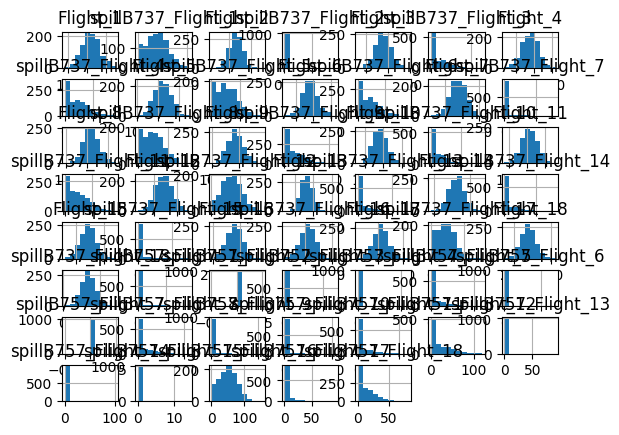

In [860]:
spillDF.hist()

In [861]:
costDF['ExpectedSpill_B757'] = 0.0

for x in range(18):
    costDF['ExpectedSpill_B757'].iloc[x] = spillDF['spillB757_Flight_'+ str(x+1)].mean()
    
costDF #show the DF

/var/folders/34/1d5cw2sd1g72r24h9_zrrfyh0000gn/T/ipykernel_2454/3149718957.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/34/1d5cw2sd1g72r24h9_zrrfyh0000gn/T/ipykernel_2454/3149718957.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/34/1d5cw2sd1g72r24h9_zrrfyh0000gn/T/ipykernel_2454/3149718957.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/

,Flight_no,Distance,OpsCost_B737,OpsCost_B757,ExpectedSpill_B737,SpillCost_B737,ActualSpillCost_B737,TotalCost_B737,ExpectedSpill_B757
0,1.0,2172.0,33231.6,54951.6,38.987105,12701.998793,10796.698974,44028.298974,2.248905
1,2.0,1244.0,19033.2,31473.2,0.004649,0.867448,0.737330,19033.937330,0.000000
2,3.0,1132.0,17319.6,28639.6,18.731539,3180.615328,2703.523029,20023.123029,1.318216
3,4.0,1244.0,19033.2,31473.2,21.688653,4047.102603,3440.037212,22473.237212,0.386259
4,5.0,2172.0,33231.6,54951.6,53.189970,17329.292358,14729.898504,47961.498504,11.897532
5,6.0,1132.0,17319.6,28639.6,21.575935,3663.593793,3114.054724,20433.654724,0.280371
6,7.0,1244.0,19033.2,31473.2,1.028865,191.986270,163.188329,19196.388329,0.000000
7,8.0,1132.0,17319.6,28639.6,51.803491,8796.232839,7476.797913,24796.397913,10.741518
8,9.0,2172.0,33231.6,54951.6,21.213201,6911.261025,5874.571871,39106.171871,0.905356
9,10.0,1244.0,19033.2,31473.2,21.135366,3943.859368,3352.280463,22385.480463,1.697337


In [862]:
# Spill Cost

costDF['SpillCost_B757'] = 0.0

for x in range(18):
    costDF['SpillCost_B757'].iloc[x] = costDF['ExpectedSpill_B757'].iloc[x] * \
                                        aircraftData['B757UnitRevenue'] * \
                                        costDF['Distance'].iloc[x]

#show the result DF
costDF

/var/folders/34/1d5cw2sd1g72r24h9_zrrfyh0000gn/T/ipykernel_2454/3449938083.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/34/1d5cw2sd1g72r24h9_zrrfyh0000gn/T/ipykernel_2454/3449938083.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/34/1d5cw2sd1g72r24h9_zrrfyh0000gn/T/ipykernel_2454/3449938083.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/

,Flight_no,Distance,OpsCost_B737,OpsCost_B757,ExpectedSpill_B737,SpillCost_B737,ActualSpillCost_B737,TotalCost_B737,ExpectedSpill_B757,SpillCost_B757
0,1.0,2172.0,33231.6,54951.6,38.987105,12701.998793,10796.698974,44028.298974,2.248905,732.693169
1,2.0,1244.0,19033.2,31473.2,0.004649,0.867448,0.737330,19033.937330,0.000000,0.000000
2,3.0,1132.0,17319.6,28639.6,18.731539,3180.615328,2703.523029,20023.123029,1.318216,223.833090
3,4.0,1244.0,19033.2,31473.2,21.688653,4047.102603,3440.037212,22473.237212,0.386259,72.075995
4,5.0,2172.0,33231.6,54951.6,53.189970,17329.292358,14729.898504,47961.498504,11.897532,3876.215827
5,6.0,1132.0,17319.6,28639.6,21.575935,3663.593793,3114.054724,20433.654724,0.280371,47.607052
6,7.0,1244.0,19033.2,31473.2,1.028865,191.986270,163.188329,19196.388329,0.000000,0.000000
7,8.0,1132.0,17319.6,28639.6,51.803491,8796.232839,7476.797913,24796.397913,10.741518,1823.909739
8,9.0,2172.0,33231.6,54951.6,21.213201,6911.261025,5874.571871,39106.171871,0.905356,294.965071
9,10.0,1244.0,19033.2,31473.2,21.135366,3943.859368,3352.280463,22385.480463,1.697337,316.723080


In [863]:
# 15% recapture rate; i.e. 85% loss of spill demand
recaptureRate = 0.15

# initialise before indexing, again.
costDF['ActualSpillCost_B757'] = 0.0

for x in range(18):
    costDF['ActualSpillCost_B757'].iloc[x] = costDF['SpillCost_B757'].iloc[x] * \
                                                (1-recaptureRate)

#show the DF
costDF

/var/folders/34/1d5cw2sd1g72r24h9_zrrfyh0000gn/T/ipykernel_2454/3619178810.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/34/1d5cw2sd1g72r24h9_zrrfyh0000gn/T/ipykernel_2454/3619178810.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/34/1d5cw2sd1g72r24h9_zrrfyh0000gn/T/ipykernel_2454/3619178810.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/

,Flight_no,Distance,OpsCost_B737,OpsCost_B757,ExpectedSpill_B737,SpillCost_B737,ActualSpillCost_B737,TotalCost_B737,ExpectedSpill_B757,SpillCost_B757,ActualSpillCost_B757
0,1.0,2172.0,33231.6,54951.6,38.987105,12701.998793,10796.698974,44028.298974,2.248905,732.693169,622.789194
1,2.0,1244.0,19033.2,31473.2,0.004649,0.867448,0.737330,19033.937330,0.000000,0.000000,0.000000
2,3.0,1132.0,17319.6,28639.6,18.731539,3180.615328,2703.523029,20023.123029,1.318216,223.833090,190.258126
3,4.0,1244.0,19033.2,31473.2,21.688653,4047.102603,3440.037212,22473.237212,0.386259,72.075995,61.264596
4,5.0,2172.0,33231.6,54951.6,53.189970,17329.292358,14729.898504,47961.498504,11.897532,3876.215827,3294.783453
5,6.0,1132.0,17319.6,28639.6,21.575935,3663.593793,3114.054724,20433.654724,0.280371,47.607052,40.465994
6,7.0,1244.0,19033.2,31473.2,1.028865,191.986270,163.188329,19196.388329,0.000000,0.000000,0.000000
7,8.0,1132.0,17319.6,28639.6,51.803491,8796.232839,7476.797913,24796.397913,10.741518,1823.909739,1550.323278
8,9.0,2172.0,33231.6,54951.6,21.213201,6911.261025,5874.571871,39106.171871,0.905356,294.965071,250.720310
9,10.0,1244.0,19033.2,31473.2,21.135366,3943.859368,3352.280463,22385.480463,1.697337,316.723080,269.214618


In [864]:
# Calculate the Total Cost for B757

# initialise before indexing
costDF['TotalCost_B757'] = 0.0
#in general, Python doesn't like this type of value assignment for DF, 
#so you will see warning but job still gets done!

for x in range(18):
    costDF['TotalCost_B757'].iloc[x] = costDF['OpsCost_B757'].iloc[x] + \
                                        costDF['ActualSpillCost_B757'].iloc[x]

#show the DF
costDF

/var/folders/34/1d5cw2sd1g72r24h9_zrrfyh0000gn/T/ipykernel_2454/2298423774.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/34/1d5cw2sd1g72r24h9_zrrfyh0000gn/T/ipykernel_2454/2298423774.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/34/1d5cw2sd1g72r24h9_zrrfyh0000gn/T/ipykernel_2454/2298423774.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/

,Flight_no,Distance,OpsCost_B737,OpsCost_B757,ExpectedSpill_B737,SpillCost_B737,ActualSpillCost_B737,TotalCost_B737,ExpectedSpill_B757,SpillCost_B757,ActualSpillCost_B757,TotalCost_B757
0,1.0,2172.0,33231.6,54951.6,38.987105,12701.998793,10796.698974,44028.298974,2.248905,732.693169,622.789194,55574.389194
1,2.0,1244.0,19033.2,31473.2,0.004649,0.867448,0.737330,19033.937330,0.000000,0.000000,0.000000,31473.200000
2,3.0,1132.0,17319.6,28639.6,18.731539,3180.615328,2703.523029,20023.123029,1.318216,223.833090,190.258126,28829.858126
3,4.0,1244.0,19033.2,31473.2,21.688653,4047.102603,3440.037212,22473.237212,0.386259,72.075995,61.264596,31534.464596
4,5.0,2172.0,33231.6,54951.6,53.189970,17329.292358,14729.898504,47961.498504,11.897532,3876.215827,3294.783453,58246.383453
5,6.0,1132.0,17319.6,28639.6,21.575935,3663.593793,3114.054724,20433.654724,0.280371,47.607052,40.465994,28680.065994
6,7.0,1244.0,19033.2,31473.2,1.028865,191.986270,163.188329,19196.388329,0.000000,0.000000,0.000000,31473.200000
7,8.0,1132.0,17319.6,28639.6,51.803491,8796.232839,7476.797913,24796.397913,10.741518,1823.909739,1550.323278,30189.923278
8,9.0,2172.0,33231.6,54951.6,21.213201,6911.261025,5874.571871,39106.171871,0.905356,294.965071,250.720310,55202.320310
9,10.0,1244.0,19033.2,31473.2,21.135366,3943.859368,3352.280463,22385.480463,1.697337,316.723080,269.214618,31742.414618


In [865]:
costDF[['TotalCost_B757']].mean()

TotalCost_B757    39816.092624
dtype: float64

In [866]:
costDF[['TotalCost_B737']].mean()

TotalCost_B737    30196.108345
dtype: float64

In [867]:
costDF[['ExpectedSpill_B737']].mean()

ExpectedSpill_B737    34.414297
dtype: float64

In [868]:
costDF[['ExpectedSpill_B757']].mean()

ExpectedSpill_B757    7.301608
dtype: float64

# Store cost data back to scheduleDF and export for optimisation modelling

In [869]:
scheduleDF

,Flight_no,Org,DepTime,DepTime(mins),Dest,ArrTime,NxtDay,ArrTime(mins),Distance,Demand_mean,Demand_Std,B737_cost,B757_cost,Flight_index
0,1,HAK,600,360,SIN,830,0,510,"2,172",208,22,0.0,0.0,1_HAKSIN
1,2,HAK,630,390,BKK,900,0,540,"1,244",115,14,0.0,0.0,2_HAKBKK
2,3,HAK,700,420,KHN,930,0,570,"1,132",176,36,0.0,0.0,3_HAKKHN
3,4,BKK,930,570,HAK,1130,0,690,"1,244",189,23,0.0,0.0,4_BKKHAK
4,5,SIN,930,570,HAK,1200,0,720,"2,172",221,38,0.0,0.0,5_SINHAK
5,6,KHN,1030,630,HAK,1230,0,750,"1,132",189,22,0.0,0.0,6_KHNHAK
6,7,HAK,1230,750,BKK,1500,0,900,"1,244",139,24,0.0,0.0,7_HAKBKK
7,8,HAK,1330,810,KHN,1530,0,930,"1,132",220,37,0.0,0.0,8_HAKKHN
8,9,HAK,1330,810,SIN,1600,0,960,"2,172",187,30,0.0,0.0,9_HAKSIN
9,10,BKK,1545,945,HAK,1745,0,1065,"1,244",180,38,0.0,0.0,10_BKKHAK


In [870]:
# assign TotalCost_B7xx to scheduleDF columns, B7xx_cost

for x in range(18):
    scheduleDF['B737_cost'].iloc[x] = costDF['TotalCost_B737'].iloc[x]
    scheduleDF['B757_cost'].iloc[x] = costDF['TotalCost_B757'].iloc[x]

#check DF
scheduleDF

/var/folders/34/1d5cw2sd1g72r24h9_zrrfyh0000gn/T/ipykernel_2454/28045172.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/34/1d5cw2sd1g72r24h9_zrrfyh0000gn/T/ipykernel_2454/28045172.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/34/1d5cw2sd1g72r24h9_zrrfyh0000gn/T/ipykernel_2454/28045172.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/34/1d5cw2sd1g72r24h9_zrrfyh0000gn/T/ipykernel_2454/

,Flight_no,Org,DepTime,DepTime(mins),Dest,ArrTime,NxtDay,ArrTime(mins),Distance,Demand_mean,Demand_Std,B737_cost,B757_cost,Flight_index
0,1,HAK,600,360,SIN,830,0,510,"2,172",208,22,44028.298974,55574.389194,1_HAKSIN
1,2,HAK,630,390,BKK,900,0,540,"1,244",115,14,19033.937330,31473.200000,2_HAKBKK
2,3,HAK,700,420,KHN,930,0,570,"1,132",176,36,20023.123029,28829.858126,3_HAKKHN
3,4,BKK,930,570,HAK,1130,0,690,"1,244",189,23,22473.237212,31534.464596,4_BKKHAK
4,5,SIN,930,570,HAK,1200,0,720,"2,172",221,38,47961.498504,58246.383453,5_SINHAK
5,6,KHN,1030,630,HAK,1230,0,750,"1,132",189,22,20433.654724,28680.065994,6_KHNHAK
6,7,HAK,1230,750,BKK,1500,0,900,"1,244",139,24,19196.388329,31473.200000,7_HAKBKK
7,8,HAK,1330,810,KHN,1530,0,930,"1,132",220,37,24796.397913,30189.923278,8_HAKKHN
8,9,HAK,1330,810,SIN,1600,0,960,"2,172",187,30,39106.171871,55202.320310,9_HAKSIN
9,10,BKK,1545,945,HAK,1745,0,1065,"1,244",180,38,22385.480463,31742.414618,10_BKKHAK


In [871]:
scheduleDF.to_csv('FleetCost_2.csv',index=False)

In [872]:
!ls

Data_Project_3.ipynb                 Untitled.ipynb
FAM-connectionMatrixGenerater.xlsx   fleetCost.csv
FleetCost_2                          flight1_spill.png
FleetCost_2.csv                      flightschedule.png
FlightSchedule.drawio                node_matrix.png
FlightSchedule2.drawio               schedule.csv
Report                               timespacegraph.png
SV_demandFigures_FAM_2601.xlsx       ~$FAM-connectionMatrixGenerater.xlsx


# Read Model Data

In [873]:
df_con = pd.read_excel('FAM-connectionMatrixGenerater.xlsx',sheet_name='connectionMatrix')

In [874]:
df_con

,1,2,3,4,5,6,7,8,9,10,...,27,28,29,30,31,32,33,34,35,36
0,-1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,-1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,-1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,-1,0,0,0,0
6,0,0,0,0,0,0,-1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,-1,0,0,...,0,0,0,0,0,0,1,0,0,0
8,0,0,0,0,0,0,0,0,-1,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,1,...,0,-1,0,0,0,0,0,0,0,0


In [875]:
# convert df to a numpy array, S[i,k]

S = df_con.to_numpy()

In [876]:
S

array([[-1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,
         0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
         0,

In [877]:
df_schedule = pd.read_csv('FleetCost_2.csv')

In [878]:
c = df_schedule[['B737_cost','B757_cost']].to_numpy()

In [879]:
c

array([[44028.29897366, 55574.38919363],
       [19033.93733046, 31473.2       ],
       [20023.1230291 , 28829.85812617],
       [22473.23721219, 31534.46459585],
       [47961.49850396, 58246.38345274],
       [20433.65472409, 28680.0659941 ],
       [19196.38832927, 31473.2       ],
       [24796.39791344, 30189.9232784 ],
       [39106.17187088, 55202.32031002],
       [22385.48046304, 31742.41461827],
       [23954.3279814 , 30083.20723961],
       [53303.02612508, 60766.12557479],
       [20723.15992387, 31539.87633161],
       [19551.70883014, 28954.13958493],
       [34110.51232268, 54960.37247783],
       [36490.80631703, 39489.83628933],
       [23512.63008042, 29254.87251867],
       [52445.59027268, 58695.01763902]])

In [880]:
scheduleDF

,Flight_no,Org,DepTime,DepTime(mins),Dest,ArrTime,NxtDay,ArrTime(mins),Distance,Demand_mean,Demand_Std,B737_cost,B757_cost,Flight_index
0,1,HAK,600,360,SIN,830,0,510,"2,172",208,22,44028.298974,55574.389194,1_HAKSIN
1,2,HAK,630,390,BKK,900,0,540,"1,244",115,14,19033.937330,31473.200000,2_HAKBKK
2,3,HAK,700,420,KHN,930,0,570,"1,132",176,36,20023.123029,28829.858126,3_HAKKHN
3,4,BKK,930,570,HAK,1130,0,690,"1,244",189,23,22473.237212,31534.464596,4_BKKHAK
4,5,SIN,930,570,HAK,1200,0,720,"2,172",221,38,47961.498504,58246.383453,5_SINHAK
5,6,KHN,1030,630,HAK,1230,0,750,"1,132",189,22,20433.654724,28680.065994,6_KHNHAK
6,7,HAK,1230,750,BKK,1500,0,900,"1,244",139,24,19196.388329,31473.200000,7_HAKBKK
7,8,HAK,1330,810,KHN,1530,0,930,"1,132",220,37,24796.397913,30189.923278,8_HAKKHN
8,9,HAK,1330,810,SIN,1600,0,960,"2,172",187,30,39106.171871,55202.320310,9_HAKSIN
9,10,BKK,1545,945,HAK,1745,0,1065,"1,244",180,38,22385.480463,31742.414618,10_BKKHAK


In [881]:
flightTime = scheduleDF

In [882]:
flightTime

,Flight_no,Org,DepTime,DepTime(mins),Dest,ArrTime,NxtDay,ArrTime(mins),Distance,Demand_mean,Demand_Std,B737_cost,B757_cost,Flight_index
0,1,HAK,600,360,SIN,830,0,510,"2,172",208,22,44028.298974,55574.389194,1_HAKSIN
1,2,HAK,630,390,BKK,900,0,540,"1,244",115,14,19033.937330,31473.200000,2_HAKBKK
2,3,HAK,700,420,KHN,930,0,570,"1,132",176,36,20023.123029,28829.858126,3_HAKKHN
3,4,BKK,930,570,HAK,1130,0,690,"1,244",189,23,22473.237212,31534.464596,4_BKKHAK
4,5,SIN,930,570,HAK,1200,0,720,"2,172",221,38,47961.498504,58246.383453,5_SINHAK
5,6,KHN,1030,630,HAK,1230,0,750,"1,132",189,22,20433.654724,28680.065994,6_KHNHAK
6,7,HAK,1230,750,BKK,1500,0,900,"1,244",139,24,19196.388329,31473.200000,7_HAKBKK
7,8,HAK,1330,810,KHN,1530,0,930,"1,132",220,37,24796.397913,30189.923278,8_HAKKHN
8,9,HAK,1330,810,SIN,1600,0,960,"2,172",187,30,39106.171871,55202.320310,9_HAKSIN
9,10,BKK,1545,945,HAK,1745,0,1065,"1,244",180,38,22385.480463,31742.414618,10_BKKHAK


In [883]:
flightTime['FlightTime'] = flightTime['ArrTime(mins)'] - flightTime['DepTime(mins)']

In [884]:
flightTime

,Flight_no,Org,DepTime,DepTime(mins),Dest,ArrTime,NxtDay,ArrTime(mins),Distance,Demand_mean,Demand_Std,B737_cost,B757_cost,Flight_index,FlightTime
0,1,HAK,600,360,SIN,830,0,510,"2,172",208,22,44028.298974,55574.389194,1_HAKSIN,150
1,2,HAK,630,390,BKK,900,0,540,"1,244",115,14,19033.937330,31473.200000,2_HAKBKK,150
2,3,HAK,700,420,KHN,930,0,570,"1,132",176,36,20023.123029,28829.858126,3_HAKKHN,150
3,4,BKK,930,570,HAK,1130,0,690,"1,244",189,23,22473.237212,31534.464596,4_BKKHAK,120
4,5,SIN,930,570,HAK,1200,0,720,"2,172",221,38,47961.498504,58246.383453,5_SINHAK,150
5,6,KHN,1030,630,HAK,1230,0,750,"1,132",189,22,20433.654724,28680.065994,6_KHNHAK,120
6,7,HAK,1230,750,BKK,1500,0,900,"1,244",139,24,19196.388329,31473.200000,7_HAKBKK,150
7,8,HAK,1330,810,KHN,1530,0,930,"1,132",220,37,24796.397913,30189.923278,8_HAKKHN,120
8,9,HAK,1330,810,SIN,1600,0,960,"2,172",187,30,39106.171871,55202.320310,9_HAKSIN,150
9,10,BKK,1545,945,HAK,1745,0,1065,"1,244",180,38,22385.480463,31742.414618,10_BKKHAK,120


In [885]:
flightTime['FlightTime'].sum()

2475

In [886]:
2475/6

412.5

In [887]:
flightTime['FlightTime'].mean()

137.5

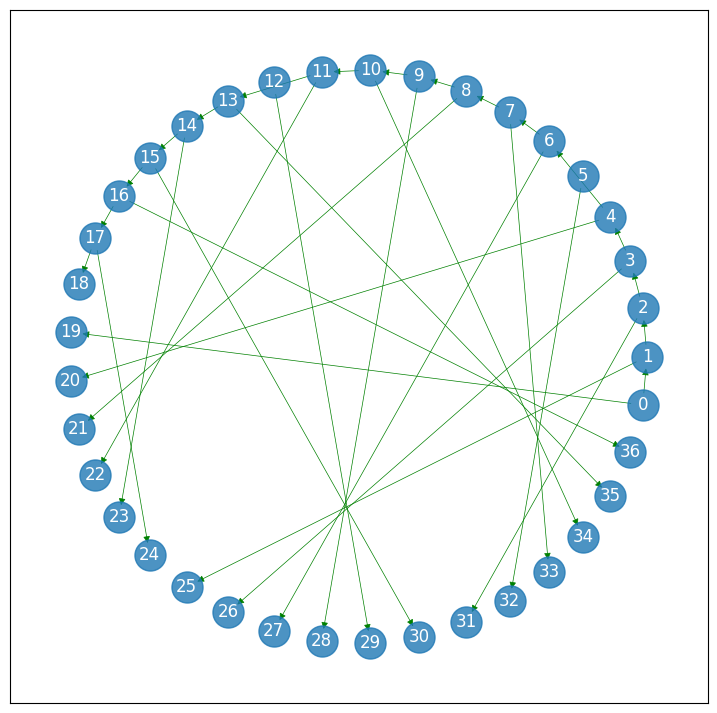

In [888]:
# Plotting a node matrix
G = nx.DiGraph()

for node in df_con.columns:
    G.add_node(node)

# Add edges
for i, row in df_con.iterrows():
    for j, value in row.items():
        if i != j and value != 0:  # Exclude self-loops
            G.add_edge(i, j, color='g')  # Set all edges to green

# Plot the graph
size = int(1.5 * (len(df_con.columns) ** 0.5))
fig = plt.figure(figsize=(size, size))
pos = nx.circular_layout(G)
nx.draw_networkx_nodes(G, pos=pos, node_size=500, alpha=0.8)
nx.draw_networkx_labels(G, pos=pos, font_color="w")
nx.draw_networkx_edges(G, pos=pos, width=0.5, edge_color=[G.edges[u, v]["color"] for u, v in G.edges])

plt.savefig('node_matrix.png', format="png", dpi=300)


# Define Network Parameters

In [889]:
# define flights
F = range(1, 19)  # {1~18}

# define fleet, 2
J = range(1, 3)  # {1~2}

# define the set of 'last nodes' of all airport lines (check the time-space graph for node numbers)
# this list represents the 3AM counting line across the network;
# mind what nodes are defined as the 'last nodes' before counting time, 3AM.
L = [18, 24, 30, 36]

# define all nodes
M = range(1, 37)  # {1~36}

# define fleet size, 2 fleets, 3 each
N = [3, 3]


# Defining Decision Variables

In [890]:
x={} # create an empty dict to store dvars in {(i,j): dvar} format

In [891]:
# Create the F x J decision variables (x_i_j),

for i in F:
    for j in J:
        #add binary variables to model 'FAM' and update the dictionary, x
        x.update({ (i,j) : FAM.binary_var(name='x_{0}_{1}'.format(i,j)) })

In [892]:
x

{(1, 1): docplex.mp.Var(type=B,name='x_1_1'),
 (1, 2): docplex.mp.Var(type=B,name='x_1_2'),
 (2, 1): docplex.mp.Var(type=B,name='x_2_1'),
 (2, 2): docplex.mp.Var(type=B,name='x_2_2'),
 (3, 1): docplex.mp.Var(type=B,name='x_3_1'),
 (3, 2): docplex.mp.Var(type=B,name='x_3_2'),
 (4, 1): docplex.mp.Var(type=B,name='x_4_1'),
 (4, 2): docplex.mp.Var(type=B,name='x_4_2'),
 (5, 1): docplex.mp.Var(type=B,name='x_5_1'),
 (5, 2): docplex.mp.Var(type=B,name='x_5_2'),
 (6, 1): docplex.mp.Var(type=B,name='x_6_1'),
 (6, 2): docplex.mp.Var(type=B,name='x_6_2'),
 (7, 1): docplex.mp.Var(type=B,name='x_7_1'),
 (7, 2): docplex.mp.Var(type=B,name='x_7_2'),
 (8, 1): docplex.mp.Var(type=B,name='x_8_1'),
 (8, 2): docplex.mp.Var(type=B,name='x_8_2'),
 (9, 1): docplex.mp.Var(type=B,name='x_9_1'),
 (9, 2): docplex.mp.Var(type=B,name='x_9_2'),
 (10, 1): docplex.mp.Var(type=B,name='x_10_1'),
 (10, 2): docplex.mp.Var(type=B,name='x_10_2'),
 (11, 1): docplex.mp.Var(type=B,name='x_11_1'),
 (11, 2): docplex.mp.Var(typ

In [893]:
# define ground nodes, G[M][J], as the number of aircraft on the ground at each node, m (in M) for each fleet j (in J)

G={} #empty dict to store dvars in {(m,j): dvar} format

for m in M:
    for j in J:
        #add integer variables to model 'FAM' and update the dictionary, G
        G.update({ (m,j) : FAM.integer_var(name='G_{0}_{1}'.format(m,j)) })

In [894]:
G

{(1, 1): docplex.mp.Var(type=I,name='G_1_1'),
 (1, 2): docplex.mp.Var(type=I,name='G_1_2'),
 (2, 1): docplex.mp.Var(type=I,name='G_2_1'),
 (2, 2): docplex.mp.Var(type=I,name='G_2_2'),
 (3, 1): docplex.mp.Var(type=I,name='G_3_1'),
 (3, 2): docplex.mp.Var(type=I,name='G_3_2'),
 (4, 1): docplex.mp.Var(type=I,name='G_4_1'),
 (4, 2): docplex.mp.Var(type=I,name='G_4_2'),
 (5, 1): docplex.mp.Var(type=I,name='G_5_1'),
 (5, 2): docplex.mp.Var(type=I,name='G_5_2'),
 (6, 1): docplex.mp.Var(type=I,name='G_6_1'),
 (6, 2): docplex.mp.Var(type=I,name='G_6_2'),
 (7, 1): docplex.mp.Var(type=I,name='G_7_1'),
 (7, 2): docplex.mp.Var(type=I,name='G_7_2'),
 (8, 1): docplex.mp.Var(type=I,name='G_8_1'),
 (8, 2): docplex.mp.Var(type=I,name='G_8_2'),
 (9, 1): docplex.mp.Var(type=I,name='G_9_1'),
 (9, 2): docplex.mp.Var(type=I,name='G_9_2'),
 (10, 1): docplex.mp.Var(type=I,name='G_10_1'),
 (10, 2): docplex.mp.Var(type=I,name='G_10_2'),
 (11, 1): docplex.mp.Var(type=I,name='G_11_1'),
 (11, 2): docplex.mp.Var(typ

In [895]:
FAM.print_information()

Model: FAM
 - number of variables: 108
   - binary=36, integer=72, continuous=0
 - number of constraints: 0
   - linear=0
 - parameters: defaults
 - objective: none
 - problem type is: MILP


# Define Constraints

### Flight can only be assigned to 1 fleet

In [896]:
FAM.add_constraints( ((FAM.sum( x[i,j] for j in J) == 1) for i in F ), names='flight_coverage')

[docplex.mp.LinearConstraint[flight_coverage1](x_1_1+x_1_2,EQ,1),
 docplex.mp.LinearConstraint[flight_coverage2](x_2_1+x_2_2,EQ,1),
 docplex.mp.LinearConstraint[flight_coverage3](x_3_1+x_3_2,EQ,1),
 docplex.mp.LinearConstraint[flight_coverage4](x_4_1+x_4_2,EQ,1),
 docplex.mp.LinearConstraint[flight_coverage5](x_5_1+x_5_2,EQ,1),
 docplex.mp.LinearConstraint[flight_coverage6](x_6_1+x_6_2,EQ,1),
 docplex.mp.LinearConstraint[flight_coverage7](x_7_1+x_7_2,EQ,1),
 docplex.mp.LinearConstraint[flight_coverage8](x_8_1+x_8_2,EQ,1),
 docplex.mp.LinearConstraint[flight_coverage9](x_9_1+x_9_2,EQ,1),
 docplex.mp.LinearConstraint[flight_coverage10](x_10_1+x_10_2,EQ,1),
 docplex.mp.LinearConstraint[flight_coverage11](x_11_1+x_11_2,EQ,1),
 docplex.mp.LinearConstraint[flight_coverage12](x_12_1+x_12_2,EQ,1),
 docplex.mp.LinearConstraint[flight_coverage13](x_13_1+x_13_2,EQ,1),
 docplex.mp.LinearConstraint[flight_coverage14](x_14_1+x_14_2,EQ,1),
 docplex.mp.LinearConstraint[flight_coverage15](x_15_1+x_15_2

In [897]:
FAM.print_information()

Model: FAM
 - number of variables: 108
   - binary=36, integer=72, continuous=0
 - number of constraints: 18
   - linear=18
 - parameters: defaults
 - objective: none
 - problem type is: MILP


### Fleet size limitation: Sum of aircraft on ground should sum to fleet size

In [898]:
FAM.add_constraints( ((FAM.sum( G[k,j] for k in L) + x[17,j]+ x[18,j] == N[j-1]) for j in J), names='fleet_size' )

[docplex.mp.LinearConstraint[fleet_size1](x_17_1+x_18_1+G_18_1+G_24_1+G_30_1+G_36_1,EQ,3),
 docplex.mp.LinearConstraint[fleet_size2](x_17_2+x_18_2+G_18_2+G_24_2+G_30_2+G_36_2,EQ,3)]

In [899]:
FAM.print_information()

Model: FAM
 - number of variables: 108
   - binary=36, integer=72, continuous=0
 - number of constraints: 20
   - linear=20
 - parameters: defaults
 - objective: none
 - problem type is: MILP


### Flow Balance

The sum of inbound flights and ground aircraft must equal to the sum of outbound flights and ground aircraft.

In [900]:
# HAK

FAM.add_constraints( ((FAM.sum( S[i-1,1-1]*x[i,j] for i in F) + G[18,j] == G[1,j]) for j in J), names='flowNight_HAK' )

[docplex.mp.LinearConstraint[flowNight_HAK1](-x_1_1+G_18_1,EQ,G_1_1),
 docplex.mp.LinearConstraint[flowNight_HAK2](-x_1_2+G_18_2,EQ,G_1_2)]

In [901]:
# SIN

FAM.add_constraints( ((FAM.sum( S[i-1,19-1]*x[i,j] for i in F) + G[24,j] == G[19,j]) for j in J), names='flowNight_SIN' )

[docplex.mp.LinearConstraint[flowNight_SIN1](x_1_1+G_24_1,EQ,G_19_1),
 docplex.mp.LinearConstraint[flowNight_SIN2](x_1_2+G_24_2,EQ,G_19_2)]

In [902]:
# BKK

FAM.add_constraints( ((FAM.sum( S[i-1,25-1]*x[i,j] for i in F) + G[30,j] == G[25,j]) for j in J), names='flowNight_BKK' )

[docplex.mp.LinearConstraint[flowNight_BKK1](x_2_1+G_30_1,EQ,G_25_1),
 docplex.mp.LinearConstraint[flowNight_BKK2](x_2_2+G_30_2,EQ,G_25_2)]

In [903]:
# KHN

FAM.add_constraints( ((FAM.sum( S[i-1,31-1]*x[i,j] for i in F) + G[36,j] == G[31,j]) for j in J), names='flowNight_KHN')

[docplex.mp.LinearConstraint[flowNight_KHN1](x_3_1+G_36_1,EQ,G_31_1),
 docplex.mp.LinearConstraint[flowNight_KHN2](x_3_2+G_36_2,EQ,G_31_2)]

In [904]:
FAM.print_information()

Model: FAM
 - number of variables: 108
   - binary=36, integer=72, continuous=0
 - number of constraints: 28
   - linear=28
 - parameters: defaults
 - objective: none
 - problem type is: MILP


### Flow Balance for Other Nodes

In [905]:
FAM.add_constraints( ((FAM.sum( S[i-1,k-1]*x[i,j] for i in F) + G[k-1,j] == G[k,j]) for j in J for k in [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]),
                    names='flowBalance_HAK')

[docplex.mp.LinearConstraint[flowBalance_HAK1](-x_2_1+G_1_1,EQ,G_2_1),
 docplex.mp.LinearConstraint[flowBalance_HAK2](-x_3_1+G_2_1,EQ,G_3_1),
 docplex.mp.LinearConstraint[flowBalance_HAK3](x_4_1+G_3_1,EQ,G_4_1),
 docplex.mp.LinearConstraint[flowBalance_HAK4](x_6_1+G_4_1,EQ,G_5_1),
 docplex.mp.LinearConstraint[flowBalance_HAK5](x_5_1+G_5_1,EQ,G_6_1),
 docplex.mp.LinearConstraint[flowBalance_HAK6](-x_7_1+G_6_1,EQ,G_7_1),
 docplex.mp.LinearConstraint[flowBalance_HAK7](-x_8_1+G_7_1,EQ,G_8_1),
 docplex.mp.LinearConstraint[flowBalance_HAK8](-x_9_1+G_8_1,EQ,G_9_1),
 docplex.mp.LinearConstraint[flowBalance_HAK9](x_10_1+G_9_1,EQ,G_10_1),
 docplex.mp.LinearConstraint[flowBalance_HAK10](x_11_1+G_10_1,EQ,G_11_1),
 docplex.mp.LinearConstraint[flowBalance_HAK11](-x_13_1+G_11_1,EQ,G_12_1),
 docplex.mp.LinearConstraint[flowBalance_HAK12](x_12_1+G_12_1,EQ,G_13_1),
 docplex.mp.LinearConstraint[flowBalance_HAK13](-x_14_1+G_13_1,EQ,G_14_1),
 docplex.mp.LinearConstraint[flowBalance_HAK14](-x_15_1+G_14_1,EQ

In [906]:
FAM.add_constraints( ((FAM.sum( S[i-1,k-1]*x[i,j] for i in F) + G[k-1,j] == G[k,j]) for j in J for k in [20,21,22,23,24]),
                    names='flowBalance_SIN')

[docplex.mp.LinearConstraint[flowBalance_SIN1](-x_5_1+G_19_1,EQ,G_20_1),
 docplex.mp.LinearConstraint[flowBalance_SIN2](x_9_1+G_20_1,EQ,G_21_1),
 docplex.mp.LinearConstraint[flowBalance_SIN3](-x_12_1+G_21_1,EQ,G_22_1),
 docplex.mp.LinearConstraint[flowBalance_SIN4](x_15_1+G_22_1,EQ,G_23_1),
 docplex.mp.LinearConstraint[flowBalance_SIN5](-x_18_1+G_23_1,EQ,G_24_1),
 docplex.mp.LinearConstraint[flowBalance_SIN6](-x_5_2+G_19_2,EQ,G_20_2),
 docplex.mp.LinearConstraint[flowBalance_SIN7](x_9_2+G_20_2,EQ,G_21_2),
 docplex.mp.LinearConstraint[flowBalance_SIN8](-x_12_2+G_21_2,EQ,G_22_2),
 docplex.mp.LinearConstraint[flowBalance_SIN9](x_15_2+G_22_2,EQ,G_23_2),
 docplex.mp.LinearConstraint[flowBalance_SIN10](-x_18_2+G_23_2,EQ,G_24_2)]

In [907]:
FAM.add_constraints( ((FAM.sum( S[i-1,k-1]*x[i,j] for i in F) + G[k-1,j] == G[k,j]) for j in J for k in [26,27,28,29,30]),
                    names='flowBalance_BKK')

[docplex.mp.LinearConstraint[flowBalance_BKK1](-x_4_1+G_25_1,EQ,G_26_1),
 docplex.mp.LinearConstraint[flowBalance_BKK2](x_7_1+G_26_1,EQ,G_27_1),
 docplex.mp.LinearConstraint[flowBalance_BKK3](-x_10_1+G_27_1,EQ,G_28_1),
 docplex.mp.LinearConstraint[flowBalance_BKK4](x_13_1+G_28_1,EQ,G_29_1),
 docplex.mp.LinearConstraint[flowBalance_BKK5](-x_16_1+G_29_1,EQ,G_30_1),
 docplex.mp.LinearConstraint[flowBalance_BKK6](-x_4_2+G_25_2,EQ,G_26_2),
 docplex.mp.LinearConstraint[flowBalance_BKK7](x_7_2+G_26_2,EQ,G_27_2),
 docplex.mp.LinearConstraint[flowBalance_BKK8](-x_10_2+G_27_2,EQ,G_28_2),
 docplex.mp.LinearConstraint[flowBalance_BKK9](x_13_2+G_28_2,EQ,G_29_2),
 docplex.mp.LinearConstraint[flowBalance_BKK10](-x_16_2+G_29_2,EQ,G_30_2)]

In [908]:
FAM.add_constraints( ((FAM.sum( S[i-1,k-1]*x[i,j] for i in F) + G[k-1,j] == G[k,j]) for j in J for k in [32,33,34,35,36]),
                    names='flowBalance_KHN')

[docplex.mp.LinearConstraint[flowBalance_KHN1](-x_6_1+G_31_1,EQ,G_32_1),
 docplex.mp.LinearConstraint[flowBalance_KHN2](x_8_1+G_32_1,EQ,G_33_1),
 docplex.mp.LinearConstraint[flowBalance_KHN3](-x_11_1+G_33_1,EQ,G_34_1),
 docplex.mp.LinearConstraint[flowBalance_KHN4](x_14_1+G_34_1,EQ,G_35_1),
 docplex.mp.LinearConstraint[flowBalance_KHN5](-x_17_1+G_35_1,EQ,G_36_1),
 docplex.mp.LinearConstraint[flowBalance_KHN6](-x_6_2+G_31_2,EQ,G_32_2),
 docplex.mp.LinearConstraint[flowBalance_KHN7](x_8_2+G_32_2,EQ,G_33_2),
 docplex.mp.LinearConstraint[flowBalance_KHN8](-x_11_2+G_33_2,EQ,G_34_2),
 docplex.mp.LinearConstraint[flowBalance_KHN9](x_14_2+G_34_2,EQ,G_35_2),
 docplex.mp.LinearConstraint[flowBalance_KHN10](-x_17_2+G_35_2,EQ,G_36_2)]

In [909]:
FAM.print_information()

Model: FAM
 - number of variables: 108
   - binary=36, integer=72, continuous=0
 - number of constraints: 92
   - linear=92
 - parameters: defaults
 - objective: none
 - problem type is: MILP


# Objective Function

In [910]:
FAM.minimize( FAM.sum( c[i-1,j-1]*x[i,j] for i in F for j in J)  )

In [911]:
FAM.get_objective_expr()

docplex.mp.LinearExpr(44028.299x_1_1+55574.389x_1_2+19033.937x_2_1+31473.200x_2_2+20023.123x_3_1+28829.858x_3_2+22473.237x_4_1+31534.465x_4_2+47961.499x_5_1+58246.383x_5_2+20433.655x_6_1+28680.066x_6_2+19196.388x_7_1+31473.200x_7_2+24796.398x_8_1+30189.923x_8_2+39106.172x_9_1+55202.320x_9_2+22385.480x_10_1+31742.415x_10_2+23954.328x_11_1+30083.207x_11_2+53303.026x_12_1+60766.126x_12_2+20723.160x_13_1+31539.876x_13_2+19551.709x_14_1+28954.140x_14_2+34110.512x_15_1+54960.372x_15_2+36490.806x_16_1+39489.836x_16_2+23512.630x_17_1+29254.873x_17_2+52445.590x_18_1+58695.018x_18_2)

In [912]:
# double check with c matrix
c

array([[44028.29897366, 55574.38919363],
       [19033.93733046, 31473.2       ],
       [20023.1230291 , 28829.85812617],
       [22473.23721219, 31534.46459585],
       [47961.49850396, 58246.38345274],
       [20433.65472409, 28680.0659941 ],
       [19196.38832927, 31473.2       ],
       [24796.39791344, 30189.9232784 ],
       [39106.17187088, 55202.32031002],
       [22385.48046304, 31742.41461827],
       [23954.3279814 , 30083.20723961],
       [53303.02612508, 60766.12557479],
       [20723.15992387, 31539.87633161],
       [19551.70883014, 28954.13958493],
       [34110.51232268, 54960.37247783],
       [36490.80631703, 39489.83628933],
       [23512.63008042, 29254.87251867],
       [52445.59027268, 58695.01763902]])

In [913]:
# Let's check the model information

FAM.print_information()

Model: FAM
 - number of variables: 108
   - binary=36, integer=72, continuous=0
 - number of constraints: 92
   - linear=92
 - parameters: defaults
 - objective: minimize
 - problem type is: MILP


# Solve

In [914]:
s = FAM.solve(log_output=True)

Version identifier: 22.1.1.0 | 2022-11-28 | 9160aff4d
CPXPARAM_Read_DataCheck                          1
Tried aggregator 2 times.
Aggregator did 64 substitutions.
Reduced MIP has 28 rows, 44 columns, and 142 nonzeros.
Reduced MIP has 22 binaries, 22 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.00 sec. (0.25 ticks)
Found incumbent of value 644530.641761 after 0.02 sec. (0.38 ticks)
Probing fixed 0 vars, tightened 5 bounds.
Probing time = 0.00 sec. (0.02 ticks)
Cover probing fixed 0 vars, tightened 6 bounds.
Tried aggregator 1 time.
Detecting symmetries...
Reduced MIP has 28 rows, 44 columns, and 142 nonzeros.
Reduced MIP has 22 binaries, 22 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.00 sec. (0.08 ticks)
Probing time = 0.00 sec. (0.01 ticks)
Cover probing fixed 0 vars, tightened 2 bounds.
MIP emphasis: balance optimality and feasibility.
MIP search method: dynamic search.
Parallel mode: deterministic, using up to 8 threads.
Root relaxation solution time = 0.00 sec. (

In [915]:
FAM.print_solution()

objective: 587250.174
status: OPTIMAL_SOLUTION(2)
  x_1_1=1
  x_2_1=1
  x_3_2=1
  x_4_1=1
  x_5_1=1
  x_6_2=1
  x_7_1=1
  x_8_2=1
  x_9_1=1
  x_10_1=1
  x_11_2=1
  x_12_1=1
  x_13_1=1
  x_14_2=1
  x_15_1=1
  x_16_1=1
  x_17_2=1
  x_18_1=1
  G_1_1=1
  G_1_2=2
  G_2_2=2
  G_3_2=1
  G_4_1=1
  G_4_2=1
  G_5_1=1
  G_5_2=2
  G_6_1=2
  G_6_2=2
  G_7_1=1
  G_7_2=2
  G_8_1=1
  G_8_2=1
  G_9_2=1
  G_10_1=1
  G_10_2=1
  G_11_1=1
  G_11_2=2
  G_12_2=2
  G_13_1=1
  G_13_2=2
  G_14_1=1
  G_14_2=1
  G_15_2=1
  G_16_1=1
  G_16_2=1
  G_17_1=1
  G_17_2=2
  G_18_1=2
  G_18_2=2
  G_19_1=1
  G_21_1=1
  G_23_1=1
  G_25_1=1
  G_27_1=1
  G_29_1=1
  G_31_2=1
  G_33_2=1
  G_35_2=1


In [916]:
# Let's print the solution in a human friendly way.

for i in F: #F=[1..8]
    for j in J: #J=[1,2]
        if x[i,j].solution_value == 1: #check if the dvar, x[i,j] == 1 or not
            print('Flight ', i, 'is assigned to Fleet ', j)

Flight  1 is assigned to Fleet  1
Flight  2 is assigned to Fleet  1
Flight  3 is assigned to Fleet  2
Flight  4 is assigned to Fleet  1
Flight  5 is assigned to Fleet  1
Flight  6 is assigned to Fleet  2
Flight  7 is assigned to Fleet  1
Flight  8 is assigned to Fleet  2
Flight  9 is assigned to Fleet  1
Flight  10 is assigned to Fleet  1
Flight  11 is assigned to Fleet  2
Flight  12 is assigned to Fleet  1
Flight  13 is assigned to Fleet  1
Flight  14 is assigned to Fleet  2
Flight  15 is assigned to Fleet  1
Flight  16 is assigned to Fleet  1
Flight  17 is assigned to Fleet  2
Flight  18 is assigned to Fleet  1
